1: What is Simple Linear Regression?

-> Simple Linear Regression (SLR) is a statistical technique used to model the relationship between one independent variable (X) and one dependent variable (Y) by fitting a straight line.

The equation of simple linear regression is:
Y= β0 + β1​X+ ε

Where:

Y = dependent variable
X = independent variable
β0= intercept
𝛽1= slope
𝜀= error term

Purpose:
To predict the value of Y based on X and understand how changes in X affect Y.


2: What are the key assumptions of Simple Linear Regression?
-> Simple Linear Regression is based on the following assumptions:

Linearity
The relationship between X and Y must be linear.

Independence of errors
Observations should be independent of each other.

Homoscedasticity
The variance of residuals should be constant across all values of X.

Normality of errors
Residuals should follow a normal distribution.

No multicollinearity
(Relevant mainly for multiple regression) Independent variables should not be highly correlated.

Violating these assumptions can lead to unreliable predictions and incorrect inferences.


3: What is heteroscedasticity, and why is it important to address in regression models?
-> Heteroscedasticity occurs when the variance of residuals is not constant across different values of the independent variable.

Why it is a problem:

Leads to biased standard errors
Makes hypothesis tests (t-test, F-test) unreliable
Reduces confidence in model predictions

How to detect:
Residual vs fitted value plot
Breusch–Pagan test
White test

How to fix:
Log or square-root transformation
Weighted Least Squares
standard errors


4: What is Multiple Linear Regression?
->Multiple Linear Regression (MLR) models the relationship between one dependent variable and two or more independent variables.

Equation:
Y=β0​+β1​X+β2​X2+ε
Difference from Linear Regression:

| Linear Regression   | Polynomial Regression      |
| ------------------- | -------------------------- |
| Straight line       | Curved line                |
| Simple relationship | Captures non-linearity     |
| Lower complexity    | Higher risk of overfitting |



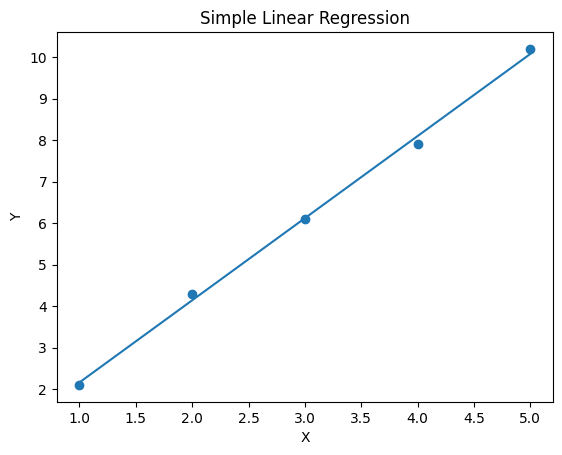

In [1]:
# 6: Simple Linear Regression – Python Implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Prediction
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()


In [3]:
# 7: Multiple Linear Regression with VIF
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]

# VIF calculation
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


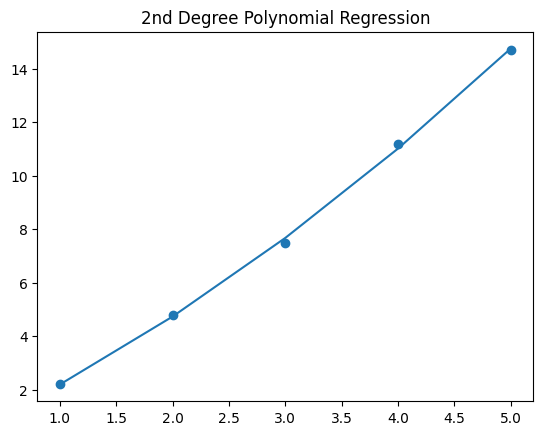

In [4]:
# 8: Polynomial Regression (2nd Degree)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("2nd Degree Polynomial Regression")
plt.show()


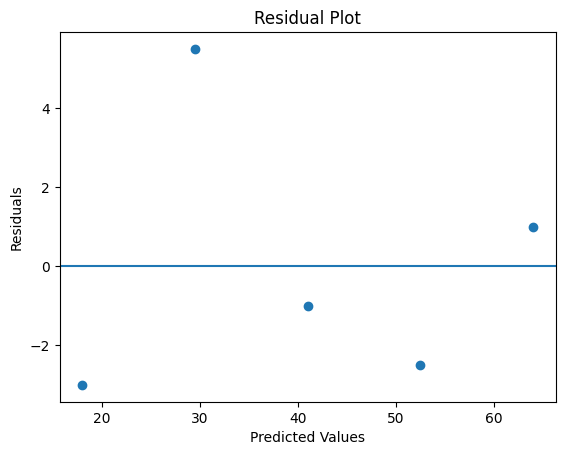

In [5]:
# 9: Residual Plot and Heteroscedasticity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


10: Handling Heteroscedasticity & Multicollinearity
-> To build a robust regression model:

Step 1: Detect problems
Residual plots for heteroscedasticity
VIF for multicollinearity

Step 2: Fix heteroscedasticity
Log transformation of target variable
Use robust standard errors
Apply weighted regression

Step 3: Fix multicollinearity
Remove highly correlated variables
Combine features
Use Ridge or Lasso regression

Step 4: Validate model
Cross-validation
Check residual diagnostics
Evaluate with RMSE, R²
This ensures accurate predictions and stable coefficients.